### Build a model to predict performance of employees, based on the visualisation and analysis of past data of employee performance 

- Teach for India has approximately 900+ fellows who are deployed across 7 cities and are working with 28000 students. Many of these students do not have the reading and numeracy skills required at their grade level. The ability to predict employee performance will enable TFI to implement learning and development measures to empower their fellows to improve the reading levels of their students.
- Here, I will use Python to create an HR analytics tool that can help a talent management team to predict employee performance and plan for their growth.

In [3]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the Data into the dataframe

In [4]:
#reading data into the df dataframe
df = pd.read_csv('Test_Data.csv')
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [5]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


### Data Cleaning

In [6]:
#renaming some of the column names
df.rename(columns={'department':'employee_work_department','region':'employee_region','education':'employee_education_level','gender':'employee_gender','recruitment_channel':'employee_recruitment_channel','no_of_trainings':'no_of_trainings_of_employee','age':'employee_age','previous_year_rating':'employee_previous_year_rating','length_of_service':'employee_length_of_service','KPIs_met >80%':'employee_met_KPI > 80%','awards_won?':'employee_awards_won','avg_training_score':'employee_avg_training_score'}, inplace=True)
df.head()

,employee_id,employee_work_department,employee_region,employee_education_level,employee_gender,employee_recruitment_channel,no_of_trainings_of_employee,employee_age,employee_previous_year_rating,employee_length_of_service,employee_met_KPI > 80%,employee_awards_won,employee_avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [7]:
#checking to see if any column contains null values
df.isnull().sum()

employee_id                         0
employee_work_department            0
employee_region                     0
employee_education_level         1034
employee_gender                     0
employee_recruitment_channel        0
no_of_trainings_of_employee         0
employee_age                        0
employee_previous_year_rating    1812
employee_length_of_service          0
employee_met_KPI > 80%              0
employee_awards_won                 0
employee_avg_training_score         0
dtype: int64

In the columns 'employee_education_level' and 'emplpoyee_previous_year_rating' there are some null values.

##### Variable 1: employee_education_level

In [8]:
education_value_counts=df['employee_education_level'].value_counts()

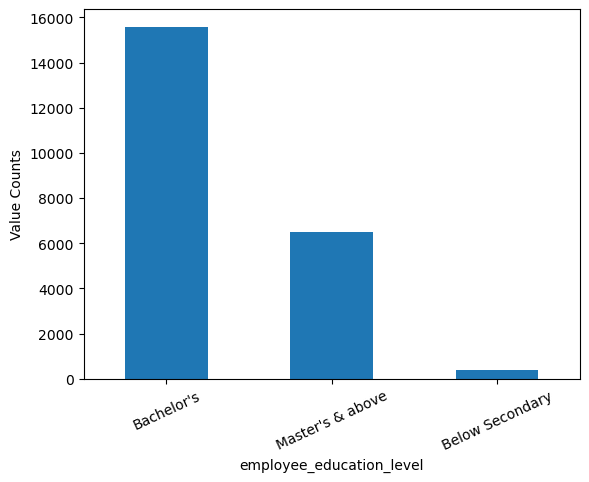

In [9]:
education_value_counts.plot(kind='bar', rot=25)
plt.ylabel('Value Counts')
plt.show()

- The dataset likely represents TFI where a Bachelor's degree is the most common educational qualification among employees.
- Employees with a Master's degree or higher are present but in a smaller proportion. 
- The 'Below Secondary' count is minimal, which may reflect minimum educational requirements for employment.

- The dataset likely represents an organization or a sector where a Bachelor's degree is the most common educational qualification among employees.
- Employees with a Master's degree or higher are present but in a smaller proportion. This could suggest that the roles in TFI do not necessarily require education beyond a Bachelor's degree, or that such qualifications are less common in the population represented.
- The 'Below Secondary' count is minimal, which may reflect minimum educational requirements for employment in the roles included in the TFI. 

In [10]:
#Treating null values in 'employee_education_level' variable

#function to replace null values with Others in the variable
def treat_null_in_education(df, col_name):
    df[col_name] = df[col_name].fillna('Others')

treat_null_in_education(df, 'employee_education_level')

To prevent data loss I labeled the null values with 'Others'. At the end of data cleaning, the goal is to retain as much as data as possible.

In [11]:
new_education_value_counts = df['employee_education_level'].value_counts()

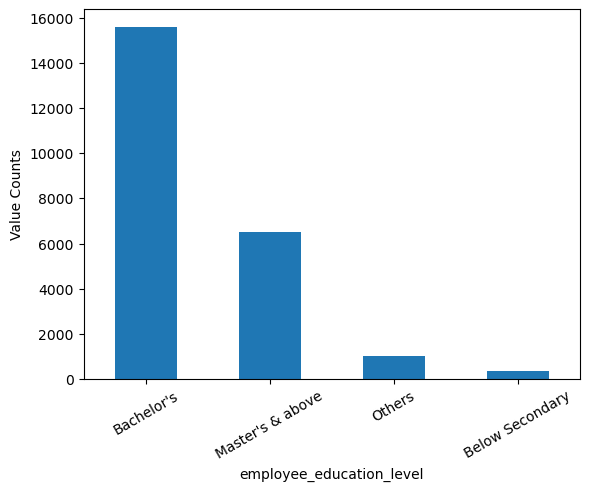

In [12]:
new_education_value_counts.plot(kind='bar', rot=30)
plt.ylabel('Value Counts')
plt.show()

The 'Others' category is now included, which contains a count of the previously missing or null data points in the 'employee_education_level' column.

##### Variable 2: employee_previous_year_rating

In [13]:
#dropping null values from the 'employee_previous_year_rating' column.
df = df.dropna(subset=['employee_previous_year_rating'])

The missing data is not significant enough to bias the results.

In [14]:
rating_value_counts = df['employee_previous_year_rating'].value_counts()

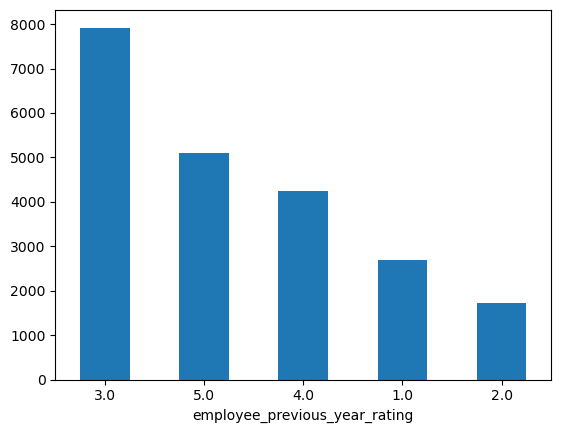

In [15]:
rating_value_counts.plot(kind='bar', rot=0)
plt.show()

- Rating '3.0' has the highest count, suggesting that most employees received a middle-of-the-road performance rating.
- The second most common rating is '5.0', indicating a significant number of employees were rated as high performers.
- Rating '4.0' is slightly less common than '5.0', but still represents a large number of employees.
- Ratings '1.0' and '2.0' are the least common, with '1.0' being the rarest. This could imply that very few employees receive the lowest performance ratings.

- The distribution of ratings suggests a standard performance curve where most employees are considered to be performing at an expected level ('3.0'), with fewer employees recognized as high ('5.0') or above average ('4.0') performers.
- The low occurrence of '1.0' and '2.0' ratings might indicate a lenient rating system, a high overall performance level, or potentially a reluctance to assign low ratings.

In [16]:
#making sure there are no more null values
df.isnull().sum()

employee_id                      0
employee_work_department         0
employee_region                  0
employee_education_level         0
employee_gender                  0
employee_recruitment_channel     0
no_of_trainings_of_employee      0
employee_age                     0
employee_previous_year_rating    0
employee_length_of_service       0
employee_met_KPI > 80%           0
employee_awards_won              0
employee_avg_training_score      0
dtype: int64

After performing data cleaning, there are no more null values present.

### Variable 3: employee_work_department

In [17]:
department_value_counts = df['employee_work_department'].value_counts()

SyntaxError: invalid syntax (3043189992.py, line 1)

In [ ]:
plt.figure(figsize=(15, 5))
department_value_counts.plot(kind='bar', rot=30)
plt.ylabel('Value Counts')
plt.show()

- ' Sales & Marketing' has the highest count, indicating that it is the largest department in terms of employee numbers in this dataset.
- The 'Operations' department follows as the second largest.
- 'Procurement' and 'Technology' have similar counts, suggesting they are smaller but comparably sized departments within the organization.
- 'Analytics', 'Finance', 'HR', 'R&D', and 'Legal' have progressively fewer employees, with 'Legal' being the smallest department.

- The visualization of 'Sales & Marketing' and 'Operations' suggests that these are likely core functions of the business, requiring the most personnel.
- The smaller size of specialized departments like 'R&D' and 'Legal' is typical for many organizations, as these functions may not require as many staff as the more central operational roles.
- Departments such as 'Analytics' and 'Finance' may be support functions that require a moderate number of employees to function effectively across the organization.

### Variable 4: employee_region

In [ ]:
region_value_counts = df['employee_region'].value_counts()

In [ ]:
plt.figure(figsize=(15, 5))
region_value_counts.plot(kind='bar')
plt.ylabel('Value Counts')
plt.show()

- The 'region_2' has the highest count of employees, suggesting that this region has the largest employee base within the organization.
- The counts for other regions vary, with 'region_22', 'region_7', and 'region_15' having more employees than the rest but still significantly fewer than 'region_2'.
- The remaining regions have progressively fewer employees, with some regions having very few employees in comparison to 'region_2'.

- The organization may need to focus more HR resources and development programs in 'region_2', given its larger workforce.
- The regions with fewer employees might be areas of potential expansion or may require different management strategies due to their smaller size.

### Variable 5: employee_gender

In [ ]:
gender_value_counts = df['employee_gender'].value_counts()

In [ ]:
gender_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- There are significantly more male employees ('m') than female employees ('f') in this dataset.
- The count of male employees exceeds 14000, while the count of female employees is just over 8000.

- There is a notable gender imbalance in the workforce represented in TFI. This could reflect the hiring practices or the nature of the company.

### Variable 6: employee_recruitment_channel

In [ ]:
recruitment_value_counts = df['employee_recruitment_channel'].value_counts()

In [ ]:
recruitment_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- The 'other' category has the highest count, suggesting that many employees were recruited through channels that are not explicitly labeled as 'sourcing' or 'referred'.
- 'Sourcing' is the next most common recruitment channel, with just slightly fewer counts than 'other'.
- The 'referred' category has the lowest count among the three, indicating that fewer employees were hired through referrals compared to other methods.

- The organization uses a variety of recruitment channels, with a significant portion coming from unspecified sources ('other'). These could include online job postings, career fairs, or direct applications to the company.

### Variable 7: no_of_trainings_of_employee

In [ ]:
trainings_value_counts = df['no_of_trainings_of_employee'].value_counts()

In [ ]:
trainings_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- A vast majority of employees have attended only one training session, as evidenced by the first bar's height, which far exceeds that of the others.
- There is a steep decline in the number of employees who have attended two training sessions, and an even more pronounced drop for those who have attended three.
- Very few employees have attended more than three training sessions, with the numbers becoming increasingly smaller for higher counts of training attendance.

- The organization might have a policy or culture that encourages or requires all employees to undergo at least one training session.

### Variable 8: employee_age

In [ ]:
age_value_counts = df['employee_age'].value_counts()

In [ ]:
plt.figure(figsize=(15,5))
age_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- The workforce is predominantly in the younger age brackets, with the highest count of employees around the age of 30.
- The number of employees gradually decreases with increasing age. This is indicative of a typical age distribution in many organizations, where younger employees outnumber their older counterparts.
- There is a noticeable tapering off as age increases, with significantly fewer employees in the late 50s and early 60s.
- The chart suggests that the organization might have a relatively young workforce, which could be reflective of recent hiring trends, the nature of the industry, or the fact that employees may tend to move on or retire around a certain age.- 

### Variable 9: employee_length_of_service

In [ ]:
service_value_counts = df['employee_length_of_service'].value_counts()

In [ ]:
plt.figure(figsize=(15,5))
service_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- There is a high number of employees with a short tenure, particularly those with 3 to 5 years of service.
- The number of employees decreases as the length of service increases, which is a common pattern in many organizations.
- There is a particularly sharp decrease after the first few years, indicating that either a lot of hiring has been done in recent years, or there is a high turnover rate within the first few years of service.
- Very few employees have extremely long tenures (over 20 years), which could suggest a relatively young organization, recent expansion, or few opportunities or incentives for long-term career development within the company.

In [ ]:
#employees having length of service for more than 11 years, labelling them as 'LoS More Than 11' so that all the different data types are labelled as one.
def more_than_10(value):
    if value > 10:
        return 'LoS More Than 11'
    else:
        return value  # or '10 or Less' or any other label you want to use for values 10 or below

# Apply the function to the 'length_of_service' column
df.loc[:,'employee_length_of_service'] = df['employee_length_of_service'].apply(more_than_10)

service_value_counts = df['employee_length_of_service'].value_counts()

In [ ]:
plt.figure(figsize=(15,5))
service_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

The category labeled "LoS More Than 11" is included, indicating that all employees with more than 11 years of service are grouped together in this bar. 

### Variable 10: employee_awards_won

In [ ]:
awards_value_counts = df['employee_awards_won'].value_counts()

In [ ]:
awards_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- A large majority of employees (indicated by the bar labeled '0') have not won any awards.
- A relatively small number of employees (indicated by the bar labeled '1') have won awards.

- Awards may be given out selectively for exceptional performance or achievements, hence only a small number of employees have received them.
- The criteria for winning awards within this organization might be stringent, making it an accomplishment that few achieve.

### Variable 11: employee_avg_trainig_score

In [ ]:
#checking out the distribution of values
df['employee_avg_training_score'].value_counts()

### Target Variable: employee_met_KPI > 80%

In [ ]:
kpi_value_counts = df['employee_met_KPI > 80%'].value_counts()

In [ ]:
kpi_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- The number of employees who did not meet the KPI (indicated by '0') is higher than those who did (indicated by '1').
- There are over 14000 instances of employees not meeting the KPI and around 8000 instances where employees met the KPI.

- The company may need to explore why a large proportion of employees are not meeting the KPI and implement training or development programs to support them.
- The KPI set at 80% might be too high, and the company could consider evaluating the KPI thresholds to ensure they are realistic and achievable.

In [ ]:
#checking for any null values left
df.info()

### Dropping unneeded columns

In [ ]:
#'employee_id' column here does not give any value in further model building
df.reset_index(inplace=True)
df.drop(columns=['employee_id'])

### Component 4

### Dummy Variables

In [151]:
department_dummy = pd.get_dummies(df['employee_work_department'], drop_first = True)
department_dummy = department_dummy.applymap(lambda x: 0 if x == False else 1)
department_dummy

,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
23484,0,0,0,0,0,0,1,0
23485,0,0,1,0,0,0,0,0
23486,0,0,0,0,0,0,0,1
23487,0,1,0,0,0,0,0,0


In [152]:
region_dummy = pd.get_dummies(df['employee_region'], drop_first = True)
region_dummy = region_dummy.applymap(lambda x: 0 if x == False else 1)
region_dummy

,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,region_19,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23487,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
education_dummy = pd.get_dummies(df['employee_education_level'], drop_first = True)
education_dummy = education_dummy.applymap(lambda x: 0 if x == False else 1)
education_dummy

,Below Secondary,Master's & above,Others
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
...,...,...,...
23484,0,0,0
23485,1,0,0
23486,0,0,0
23487,0,0,0


In [154]:
gender_dummy = pd.get_dummies(df['employee_gender'], drop_first = True)
gender_dummy = gender_dummy.applymap(lambda x: 0 if x == False else 1)
gender_dummy

,m
1,0
2,1
3,0
4,1
5,1
...,...
23484,1
23485,1
23486,1
23487,0


In [155]:
recruitment_channel_dummy = pd.get_dummies(df['employee_recruitment_channel'], drop_first = True)
recruitment_channel_dummy = recruitment_channel_dummy.applymap(lambda x: 0 if x == False else 1)
recruitment_channel_dummy

,referred,sourcing
1,0,0
2,0,0
3,0,0
4,0,1
5,0,1
...,...,...
23484,0,0
23485,0,1
23486,0,1
23487,0,1


In [156]:
length_of_service_dummy = pd.get_dummies(df['employee_length_of_service'], drop_first = True)
length_of_service_dummy = length_of_service_dummy.applymap(lambda x: 0 if x == False else 1)
length_of_service_dummy

,2,3,4,5,6,7,8,9,10,LoS More Than 11
1,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
23484,1,0,0,0,0,0,0,0,0,0
23485,0,0,0,0,0,0,0,0,0,0
23486,0,0,0,0,0,1,0,0,0,0
23487,0,0,1,0,0,0,0,0,0,0


### Concat


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21678 entries, 1 to 23489
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   employee_work_department       21678 non-null  object 
 1   employee_region                21678 non-null  object 
 2   employee_education_level       21678 non-null  object 
 3   employee_gender                21678 non-null  object 
 4   employee_recruitment_channel   21678 non-null  object 
 5   no_of_trainings_of_employee    21678 non-null  int64  
 6   employee_age                   21678 non-null  int64  
 7   employee_previous_year_rating  21678 non-null  float64
 8   employee_length_of_service     21678 non-null  object 
 9   employee_met_KPI > 80%         21678 non-null  int64  
 10  employee_awards_won            21678 non-null  int64  
 11  employee_avg_training_score    21678 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 2.

#### Numerical Dataframes

In [158]:
no_of_trainings = df['no_of_trainings_of_employee']

In [159]:
age = df['employee_age']

In [160]:
previous_year_rating = df['employee_previous_year_rating']

In [161]:
kpi = df['employee_met_KPI > 80%']

In [162]:
awards_won = df['employee_awards_won']

In [163]:
avg_training_score = df['employee_avg_training_score']

### Performing Concat

In [164]:
final_df = pd.concat([no_of_trainings, age, previous_year_rating, kpi, awards_won, avg_training_score, department_dummy,region_dummy, education_dummy,gender_dummy, recruitment_channel_dummy, length_of_service_dummy], axis=1)
final_df.columns

Index([  'no_of_trainings_of_employee',                  'employee_age',
       'employee_previous_year_rating',        'employee_met_KPI > 80%',
                 'employee_awards_won',   'employee_avg_training_score',
                             'Finance',                            'HR',
                               'Legal',                    'Operations',
                         'Procurement',                           'R&D',
                   'Sales & Marketing',                    'Technology',
                           'region_10',                     'region_11',
                           'region_12',                     'region_13',
                           'region_14',                     'region_15',
                           'region_16',                     'region_17',
                           'region_18',                     'region_19',
                            'region_2',                     'region_20',
                           'region_21',            

In [165]:
final_df

,no_of_trainings_of_employee,employee_age,employee_previous_year_rating,employee_met_KPI > 80%,employee_awards_won,employee_avg_training_score,Finance,HR,Legal,Operations,...,2,3,4,5,6,7,8,9,10,LoS More Than 11
1,1,31,3.0,0,0,51,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,31,1.0,0,0,47,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,31,2.0,0,0,65,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,30,4.0,0,0,61,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1,36,3.0,0,0,68,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23484,1,28,4.0,0,0,51,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
23485,1,24,3.0,0,0,61,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
23486,1,31,3.0,0,0,74,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
23487,1,26,4.0,0,0,50,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Train and Test

In [166]:
import sklearn
from sklearn.model_selection import train_test_split

In [167]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [169]:
# creating a list of numeric variables 

numeric = ['no_of_trainings_of_employee','employee_age','employee_previous_year_rating','employee_met_KPI > 80%','employee_awards_won','employee_avg_training_score']

In [170]:
def scaling(df, col_name, scaling):
    scaler = scaling()
    df[col_name]=scaler.fit_transform(df[col_name])

In [171]:
minmax = scaling(final_df,numeric,MinMaxScaler)

In [172]:
final_df[numeric]

,no_of_trainings_of_employee,employee_age,employee_previous_year_rating,employee_met_KPI > 80%,employee_awards_won,employee_avg_training_score
1,0.00,0.275,0.50,0.0,0.0,0.200000
2,0.00,0.275,0.00,0.0,0.0,0.133333
3,0.25,0.275,0.25,0.0,0.0,0.433333
4,0.00,0.250,0.75,0.0,0.0,0.366667
5,0.00,0.400,0.50,0.0,0.0,0.483333
...,...,...,...,...,...,...
23484,0.00,0.200,0.75,0.0,0.0,0.200000
23485,0.00,0.100,0.50,0.0,0.0,0.366667
23486,0.00,0.275,0.50,0.0,0.0,0.583333
23487,0.00,0.150,0.75,0.0,0.0,0.183333


In [173]:
# Preparing the data
x = final_df.drop('employee_met_KPI > 80%', axis=1)
x.columns = x.columns.astype(str)  # Ensuring all column names are strings
y = final_df['employee_met_KPI > 80%']

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

# Instantiating and fitting the model
logistic_classifier = LogisticRegression(max_iter=1000)  # Only instantiate once
logistic_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train = logistic_classifier.predict(x_train)
y_pred_test = logistic_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print("Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Training set evaluation:
[[8375 1411]
 [2904 2484]]
              precision    recall  f1-score   support

         0.0       0.74      0.86      0.80      9786
         1.0       0.64      0.46      0.54      5388

    accuracy                           0.72     15174
   macro avg       0.69      0.66      0.67     15174
weighted avg       0.71      0.72      0.70     15174

Test set evaluation:
[[3486  623]
 [1275 1120]]
              precision    recall  f1-score   support

         0.0       0.73      0.85      0.79      4109
         1.0       0.64      0.47      0.54      2395

    accuracy                           0.71      6504
   macro avg       0.69      0.66      0.66      6504
weighted avg       0.70      0.71      0.70      6504



In [174]:
from xgboost import XGBClassifier

# Instantiating and fitting the model
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train_xgb = xgb_classifier.predict(x_train)
y_pred_test_xgb = xgb_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("XGBoost - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_xgb))
print(classification_report(y_train, y_pred_train_xgb))

print("XGBoost - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_xgb))
print(classification_report(y_test, y_pred_test_xgb))


/Users/dipanshuksh/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost - Training set evaluation:
[[8964  822]
 [2067 3321]]
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      9786
         1.0       0.80      0.62      0.70      5388

    accuracy                           0.81     15174
   macro avg       0.81      0.77      0.78     15174
weighted avg       0.81      0.81      0.80     15174

XGBoost - Test set evaluation:
[[3451  658]
 [1240 1155]]
              precision    recall  f1-score   support

         0.0       0.74      0.84      0.78      4109
         1.0       0.64      0.48      0.55      2395

    accuracy                           0.71      6504
   macro avg       0.69      0.66      0.67      6504
weighted avg       0.70      0.71      0.70      6504



In [175]:
from catboost import CatBoostClassifier

# Instantiating and fitting the model
catboost_classifier = CatBoostClassifier(verbose=0)  # verbose=0 to keep the output clean
catboost_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train_cat = catboost_classifier.predict(x_train)
y_pred_test_cat = catboost_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("CatBoost - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_cat))
print(classification_report(y_train, y_pred_train_cat))

print("CatBoost - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_cat))
print(classification_report(y_test, y_pred_test_cat))


CatBoost - Training set evaluation:
[[8847  939]
 [2370 3018]]
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84      9786
         1.0       0.76      0.56      0.65      5388

    accuracy                           0.78     15174
   macro avg       0.78      0.73      0.74     15174
weighted avg       0.78      0.78      0.77     15174

CatBoost - Test set evaluation:
[[3496  613]
 [1224 1171]]
              precision    recall  f1-score   support

         0.0       0.74      0.85      0.79      4109
         1.0       0.66      0.49      0.56      2395

    accuracy                           0.72      6504
   macro avg       0.70      0.67      0.68      6504
weighted avg       0.71      0.72      0.71      6504



In [176]:
from lightgbm import LGBMClassifier

# Instantiating and fitting the model
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train_lgbm = lgbm_classifier.predict(x_train)
y_pred_test_lgbm = lgbm_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("LightGBM - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_lgbm))
print(classification_report(y_train, y_pred_train_lgbm))

print("LightGBM - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_lgbm))
print(classification_report(y_test, y_pred_test_lgbm))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5388, number of negative: 9786
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 228
[LightGBM] [Info] Number of data points in the train set: 15174, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355081 -> initscore=-0.596779
[LightGBM] [Info] Start training from score -0.596779
LightGBM - Training set evaluation:
[[8748 1038]
 [2538 2850]]
              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83      9786
         1.0       0.73      0.53      0.61      5388

    accuracy                           0.76     15174
   macro avg       0.75      0.71      0.72     15174
weighted avg       0.76      0

In [177]:
robust = scaling(final_df,numeric,RobustScaler)

In [178]:
final_df[numeric]

,no_of_trainings_of_employee,employee_age,employee_previous_year_rating,employee_met_KPI > 80%,employee_awards_won,employee_avg_training_score
1,0.00,-0.333333,0.0,0.0,0.0,-0.375000
2,0.00,-0.333333,-2.0,0.0,0.0,-0.541667
3,0.25,-0.333333,-1.0,0.0,0.0,0.208333
4,0.00,-0.444444,1.0,0.0,0.0,0.041667
5,0.00,0.222222,0.0,0.0,0.0,0.333333
...,...,...,...,...,...,...
23484,0.00,-0.666667,1.0,0.0,0.0,-0.375000
23485,0.00,-1.111111,0.0,0.0,0.0,0.041667
23486,0.00,-0.333333,0.0,0.0,0.0,0.583333
23487,0.00,-0.888889,1.0,0.0,0.0,-0.416667


In [179]:
final_df['employee_met_KPI > 80%'].unique()

array([0., 1.])

In [180]:
# Preparing the data
x = final_df.drop('employee_met_KPI > 80%', axis=1)
x.columns = x.columns.astype(str)  # Ensuring all column names are strings
y = final_df['employee_met_KPI > 80%']


# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

# Instantiating and fitting the model
logistic_classifier = LogisticRegression(max_iter=1000)  # Only instantiate once
logistic_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train = logistic_classifier.predict(x_train)
y_pred_test = logistic_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print("Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Training set evaluation:
[[8368 1418]
 [2896 2492]]
              precision    recall  f1-score   support

         0.0       0.74      0.86      0.80      9786
         1.0       0.64      0.46      0.54      5388

    accuracy                           0.72     15174
   macro avg       0.69      0.66      0.67     15174
weighted avg       0.71      0.72      0.70     15174

Test set evaluation:
[[3486  623]
 [1270 1125]]
              precision    recall  f1-score   support

         0.0       0.73      0.85      0.79      4109
         1.0       0.64      0.47      0.54      2395

    accuracy                           0.71      6504
   macro avg       0.69      0.66      0.66      6504
weighted avg       0.70      0.71      0.70      6504



In [181]:
from xgboost import XGBClassifier

# Instantiating and fitting the model
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train_xgb = xgb_classifier.predict(x_train)
y_pred_test_xgb = xgb_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("XGBoost - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_xgb))
print(classification_report(y_train, y_pred_train_xgb))

print("XGBoost - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_xgb))
print(classification_report(y_test, y_pred_test_xgb))


/Users/dipanshuksh/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost - Training set evaluation:
[[8964  822]
 [2067 3321]]
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      9786
         1.0       0.80      0.62      0.70      5388

    accuracy                           0.81     15174
   macro avg       0.81      0.77      0.78     15174
weighted avg       0.81      0.81      0.80     15174

XGBoost - Test set evaluation:
[[3452  657]
 [1241 1154]]
              precision    recall  f1-score   support

         0.0       0.74      0.84      0.78      4109
         1.0       0.64      0.48      0.55      2395

    accuracy                           0.71      6504
   macro avg       0.69      0.66      0.67      6504
weighted avg       0.70      0.71      0.70      6504



In [182]:
from catboost import CatBoostClassifier

# Instantiating and fitting the model
catboost_classifier = CatBoostClassifier(verbose=0)  # verbose=0 to keep the output clean
catboost_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train_cat = catboost_classifier.predict(x_train)
y_pred_test_cat = catboost_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("CatBoost - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_cat))
print(classification_report(y_train, y_pred_train_cat))

print("CatBoost - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_cat))
print(classification_report(y_test, y_pred_test_cat))


CatBoost - Training set evaluation:
[[8847  939]
 [2370 3018]]
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84      9786
         1.0       0.76      0.56      0.65      5388

    accuracy                           0.78     15174
   macro avg       0.78      0.73      0.74     15174
weighted avg       0.78      0.78      0.77     15174

CatBoost - Test set evaluation:
[[3496  613]
 [1224 1171]]
              precision    recall  f1-score   support

         0.0       0.74      0.85      0.79      4109
         1.0       0.66      0.49      0.56      2395

    accuracy                           0.72      6504
   macro avg       0.70      0.67      0.68      6504
weighted avg       0.71      0.72      0.71      6504



In [183]:
from lightgbm import LGBMClassifier

# Instantiating and fitting the model
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train_lgbm = lgbm_classifier.predict(x_train)
y_pred_test_lgbm = lgbm_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("LightGBM - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_lgbm))
print(classification_report(y_train, y_pred_train_lgbm))

print("LightGBM - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_lgbm))
print(classification_report(y_test, y_pred_test_lgbm))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5388, number of negative: 9786
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 227
[LightGBM] [Info] Number of data points in the train set: 15174, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355081 -> initscore=-0.596779
[LightGBM] [Info] Start training from score -0.596779
LightGBM - Training set evaluation:
[[8748 1038]
 [2538 2850]]
              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83      9786
         1.0       0.73      0.53      0.61      5388

    accuracy                           0.76     15174
   macro avg       0.75      0.71      0.72     15174
weighted avg       0.76      0

In [184]:
standard = scaling(final_df,numeric,StandardScaler)

In [185]:
final_df[numeric]

,no_of_trainings_of_employee,employee_age,employee_previous_year_rating,employee_met_KPI > 80%,employee_awards_won,employee_avg_training_score
1,-0.419540,-0.585915,-0.268468,-0.748418,-0.152865,-0.917777
2,-0.419540,-0.585915,-1.851666,-0.748418,-0.152865,-1.217594
3,2.963309,-0.585915,-1.060067,-0.748418,-0.152865,0.131583
4,-0.419540,-0.717704,0.523132,-0.748418,-0.152865,-0.168234
5,-0.419540,0.073032,-0.268468,-0.748418,-0.152865,0.356446
...,...,...,...,...,...,...
23484,-0.419540,-0.981283,0.523132,-0.748418,-0.152865,-0.917777
23485,-0.419540,-1.508441,-0.268468,-0.748418,-0.152865,-0.168234
23486,-0.419540,-0.585915,-0.268468,-0.748418,-0.152865,0.806172
23487,-0.419540,-1.244862,0.523132,-0.748418,-0.152865,-0.992731


In [186]:
final_df['employee_met_KPI > 80%'].unique()

array([-0.74841803,  1.33615167])

In [187]:
# Preparing the data
x = final_df.drop('employee_met_KPI > 80%', axis=1)
x.columns = x.columns.astype(str)  # Ensuring all column names are strings
y = final_df['employee_met_KPI > 80%']

# Assuming values less than 0 should be class 0 and greater than 0 should be class 1
y = np.where(y < 0, 0, 1)

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

# Instantiating and fitting the model
logistic_classifier = LogisticRegression(max_iter=1000)  # Only instantiate once
logistic_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train = logistic_classifier.predict(x_train)
y_pred_test = logistic_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print("Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Training set evaluation:
[[8374 1412]
 [2897 2491]]
              precision    recall  f1-score   support

           0       0.74      0.86      0.80      9786
           1       0.64      0.46      0.54      5388

    accuracy                           0.72     15174
   macro avg       0.69      0.66      0.67     15174
weighted avg       0.71      0.72      0.70     15174

Test set evaluation:
[[3486  623]
 [1271 1124]]
              precision    recall  f1-score   support

           0       0.73      0.85      0.79      4109
           1       0.64      0.47      0.54      2395

    accuracy                           0.71      6504
   macro avg       0.69      0.66      0.66      6504
weighted avg       0.70      0.71      0.70      6504



In [188]:
from xgboost import XGBClassifier

# Instantiating and fitting the model
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train_xgb = xgb_classifier.predict(x_train)
y_pred_test_xgb = xgb_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("XGBoost - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_xgb))
print(classification_report(y_train, y_pred_train_xgb))

print("XGBoost - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_xgb))
print(classification_report(y_test, y_pred_test_xgb))


/Users/dipanshuksh/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost - Training set evaluation:
[[8964  822]
 [2067 3321]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      9786
           1       0.80      0.62      0.70      5388

    accuracy                           0.81     15174
   macro avg       0.81      0.77      0.78     15174
weighted avg       0.81      0.81      0.80     15174

XGBoost - Test set evaluation:
[[3451  658]
 [1240 1155]]
              precision    recall  f1-score   support

           0       0.74      0.84      0.78      4109
           1       0.64      0.48      0.55      2395

    accuracy                           0.71      6504
   macro avg       0.69      0.66      0.67      6504
weighted avg       0.70      0.71      0.70      6504



In [189]:
from catboost import CatBoostClassifier

# Instantiating and fitting the model
catboost_classifier = CatBoostClassifier(verbose=0)  # verbose=0 to keep the output clean
catboost_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train_cat = catboost_classifier.predict(x_train)
y_pred_test_cat = catboost_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("CatBoost - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_cat))
print(classification_report(y_train, y_pred_train_cat))

print("CatBoost - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_cat))
print(classification_report(y_test, y_pred_test_cat))


CatBoost - Training set evaluation:
[[8847  939]
 [2370 3018]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      9786
           1       0.76      0.56      0.65      5388

    accuracy                           0.78     15174
   macro avg       0.78      0.73      0.74     15174
weighted avg       0.78      0.78      0.77     15174

CatBoost - Test set evaluation:
[[3496  613]
 [1224 1171]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      4109
           1       0.66      0.49      0.56      2395

    accuracy                           0.72      6504
   macro avg       0.70      0.67      0.68      6504
weighted avg       0.71      0.72      0.71      6504



In [190]:
from lightgbm import LGBMClassifier

# Instantiating and fitting the model
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train_lgbm = lgbm_classifier.predict(x_train)
y_pred_test_lgbm = lgbm_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("LightGBM - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_lgbm))
print(classification_report(y_train, y_pred_train_lgbm))

print("LightGBM - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_lgbm))
print(classification_report(y_test, y_pred_test_lgbm))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5388, number of negative: 9786
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 232
[LightGBM] [Info] Number of data points in the train set: 15174, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355081 -> initscore=-0.596779
[LightGBM] [Info] Start training from score -0.596779
LightGBM - Training set evaluation:
[[8748 1038]
 [2538 2850]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      9786
           1       0.73      0.53      0.61      5388

    accuracy                           0.76     15174
   macro avg       0.75      0.71      0.72     15174
weighted avg       0.76      0

In [191]:
maxabs = scaling(final_df,numeric,MaxAbsScaler)

In [192]:
final_df[numeric]

,no_of_trainings_of_employee,employee_age,employee_previous_year_rating,employee_met_KPI > 80%,employee_awards_won,employee_avg_training_score
1,-0.031997,-0.181063,-0.144987,-0.56013,-0.023368,-0.342450
2,-0.031997,-0.181063,-1.000000,-0.56013,-0.023368,-0.454321
3,0.226002,-0.181063,-0.572493,-0.56013,-0.023368,0.049098
4,-0.031997,-0.221789,0.282520,-0.56013,-0.023368,-0.062773
5,-0.031997,0.022569,-0.144987,-0.56013,-0.023368,0.133001
...,...,...,...,...,...,...
23484,-0.031997,-0.303242,0.282520,-0.56013,-0.023368,-0.342450
23485,-0.031997,-0.466147,-0.144987,-0.56013,-0.023368,-0.062773
23486,-0.031997,-0.181063,-0.144987,-0.56013,-0.023368,0.300807
23487,-0.031997,-0.384694,0.282520,-0.56013,-0.023368,-0.370418


In [193]:
final_df['employee_met_KPI > 80%'].unique()

array([-0.56012954,  1.        ])

In [194]:
# Preparing the data
x = final_df.drop('employee_met_KPI > 80%', axis=1)
x.columns = x.columns.astype(str)  # Ensuring all column names are strings
y = final_df['employee_met_KPI > 80%']

# Converting the target variable to binary classes
y = np.where(y > 0, 1, 0)  # Mapping positive values to 1 and negative to 0

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

# Instantiating and fitting the model
logistic_classifier = LogisticRegression(max_iter=1000)  # Only instantiate once
logistic_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train = logistic_classifier.predict(x_train)
y_pred_test = logistic_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print("Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Training set evaluation:
[[8372 1414]
 [2898 2490]]
              precision    recall  f1-score   support

           0       0.74      0.86      0.80      9786
           1       0.64      0.46      0.54      5388

    accuracy                           0.72     15174
   macro avg       0.69      0.66      0.67     15174
weighted avg       0.71      0.72      0.70     15174

Test set evaluation:
[[3486  623]
 [1274 1121]]
              precision    recall  f1-score   support

           0       0.73      0.85      0.79      4109
           1       0.64      0.47      0.54      2395

    accuracy                           0.71      6504
   macro avg       0.69      0.66      0.66      6504
weighted avg       0.70      0.71      0.70      6504



In [195]:
from xgboost import XGBClassifier

# Instantiating and fitting the model with the mapped y values
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(x_train, y_train)  # Use y_train_mapped here

# Making predictions with the model
y_pred_train_xgb = xgb_classifier.predict(x_train)
y_pred_test_xgb = xgb_classifier.predict(x_test)

# Evaluating the model with the correctly mapped pairs
print("XGBoost - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_xgb))  # Use y_train_mapped here
print(classification_report(y_train, y_pred_train_xgb))  # Use y_train_mapped here

print("XGBoost - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_xgb))  # Use y_test_mapped here
print(classification_report(y_test, y_pred_test_xgb))  # Use y_test_mapped here

/Users/dipanshuksh/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost - Training set evaluation:
[[8964  822]
 [2067 3321]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      9786
           1       0.80      0.62      0.70      5388

    accuracy                           0.81     15174
   macro avg       0.81      0.77      0.78     15174
weighted avg       0.81      0.81      0.80     15174

XGBoost - Test set evaluation:
[[3452  657]
 [1240 1155]]
              precision    recall  f1-score   support

           0       0.74      0.84      0.78      4109
           1       0.64      0.48      0.55      2395

    accuracy                           0.71      6504
   macro avg       0.69      0.66      0.67      6504
weighted avg       0.70      0.71      0.70      6504



In [196]:
from catboost import CatBoostClassifier

# Instantiating and fitting the model
catboost_classifier = CatBoostClassifier(verbose=0)  # verbose=0 to keep the output clean
catboost_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train_cat = catboost_classifier.predict(x_train)
y_pred_test_cat = catboost_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("CatBoost - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_cat))
print(classification_report(y_train, y_pred_train_cat))

print("CatBoost - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_cat))
print(classification_report(y_test, y_pred_test_cat))


CatBoost - Training set evaluation:
[[8847  939]
 [2370 3018]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      9786
           1       0.76      0.56      0.65      5388

    accuracy                           0.78     15174
   macro avg       0.78      0.73      0.74     15174
weighted avg       0.78      0.78      0.77     15174

CatBoost - Test set evaluation:
[[3496  613]
 [1224 1171]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      4109
           1       0.66      0.49      0.56      2395

    accuracy                           0.72      6504
   macro avg       0.70      0.67      0.68      6504
weighted avg       0.71      0.72      0.71      6504



In [197]:
from lightgbm import LGBMClassifier

# Instantiating and fitting the model
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train_lgbm = lgbm_classifier.predict(x_train)
y_pred_test_lgbm = lgbm_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("LightGBM - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_lgbm))
print(classification_report(y_train, y_pred_train_lgbm))

print("LightGBM - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_lgbm))
print(classification_report(y_test, y_pred_test_lgbm))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5388, number of negative: 9786
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 232
[LightGBM] [Info] Number of data points in the train set: 15174, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355081 -> initscore=-0.596779
[LightGBM] [Info] Start training from score -0.596779
LightGBM - Training set evaluation:
[[8748 1038]
 [2538 2850]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      9786
           1       0.73      0.53      0.61      5388

    accuracy                           0.76     15174
   macro avg       0.75      0.71      0.72     15174
weighted avg       0.76      0